<h4>I used Claude, Anthropic's model to help with the code portion of this assignment.</h4>
<h4>I used Copilot for help understanding these concepts.</h4>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

<h3>(1) Use the condition enum_{ie_i} = 0 to prove that the sample regression line goes through the sample means of the dependent and independent variables, i.e., that Y{hat} = X{hat}b.</h3>


PROOF: Regression Line Passes Through Sample Means

1. REGRESSION EQUATION:
   Y_hat = 2.2397 + 1.5057 * X

2. SAMPLE MEANS:
   X̄ = 10.2943
   Ȳ = 17.7399

3. CONDITION: Σeᵢ = 0
   Sum of residuals = 0.0000000000
   (Should be approximately 0)
   (Fancy way of saying my errors or residuals between my actual Y and predicted Y equal 0.)

4. MATHEMATICAL PROOF:
   Starting with the condition Σeᵢ = 0
   where eᵢ = Yᵢ - Ŷᵢ = Yᵢ - (b₀ + b₁Xᵢ), this basically says my residual or error is equal to y actual minues my y hat or predicted y. Then we substitute Y_hat with our linear regression equation.

   Σeᵢ = Σ(Yᵢ - b₀ - b₁Xᵢ) = 0, The residuals(eᵢ) get substituted with this equation since they are equal to each other. (Yᵢ - b₀ - b₁Xᵢ)
   ΣYᵢ - nb₀ - b₁ΣXᵢ = 0, Now we use summation properties to split our variables. This works due to basic algebra principals, aka we distributed the summation sign, and this works since b₀ & b₁ are constants.
   ΣYᵢ - nb₀ - b₁ΣXᵢ = 0

   Dividing by n:
   (ΣYᵢ/n

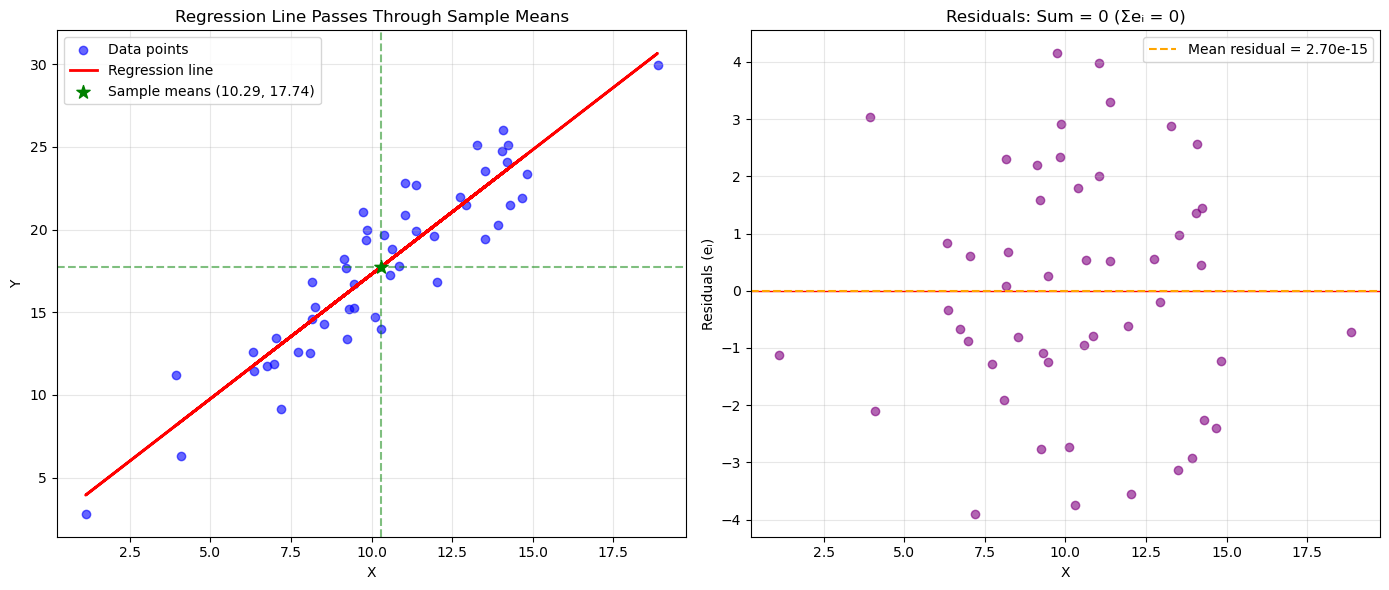

In [3]:
# Generate sample data
np.random.seed(66)
n = 50
X = np.random.normal(10, 3, n)
Y = 2 + 1.5 * X + np.random.normal(0, 2, n)

# Fit linear regression
X_reshaped = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X_reshaped, Y)

# Get coefficients
b0 = model.intercept_
b1 = model.coef_[0]
Y_pred = model.predict(X_reshaped)

# Calculate residuals
residuals = Y - Y_pred

print("=" * 60)
print("PROOF: Regression Line Passes Through Sample Means")
print("=" * 60)

print(f"\n1. REGRESSION EQUATION:")
print(f"   Y_hat = {b0:.4f} + {b1:.4f} * X")

print(f"\n2. SAMPLE MEANS:")
X_mean = np.mean(X)
Y_mean = np.mean(Y)
print(f"   X̄ = {X_mean:.4f}")
print(f"   Ȳ = {Y_mean:.4f}")

print(f"\n3. CONDITION: Σeᵢ = 0")
sum_residuals = np.sum(residuals)
print(f"   Sum of residuals = {sum_residuals:.10f}")
print(f"   (Should be approximately 0)")
print(f"   (Fancy way of saying my errors or residuals between my actual Y and predicted Y equal 0.)")


print(f"\n4. MATHEMATICAL PROOF:")
print("   Starting with the condition Σeᵢ = 0")
print("   where eᵢ = Yᵢ - Ŷᵢ = Yᵢ - (b₀ + b₁Xᵢ), this basically says my residual or error is equal to y actual minues my y hat or predicted y. Then we substitute Y_hat with our linear regression equation.")
print()
print("   Σeᵢ = Σ(Yᵢ - b₀ - b₁Xᵢ) = 0, The residuals(eᵢ) get substituted with this equation since they are equal to each other. (Yᵢ - b₀ - b₁Xᵢ)")
print("   ΣYᵢ - nb₀ - b₁ΣXᵢ = 0, Now we use summation properties to split our variables. This works due to basic algebra principals, aka we distributed the summation sign, and this works since b₀ & b₁ are constants.")
print("   ΣYᵢ - nb₀ - b₁ΣXᵢ = 0")
print()
print("   Dividing by n:")
print("   (ΣYᵢ/n) - b₀ - b₁(ΣXᵢ/n) = 0")
print("   Ȳ - b₀ - b₁X̄ = 0")
print("   Therefore: Ȳ = b₀ + b₁X̄")
print("   n is the number of observations or data points we have currently. We divided by n since we are getting the summation of our data points meaning we are finding the mean(mean is total sum divided by count).")
print("   Now we can see that we basically have our linear regression equation again, but it's solving for the mean Y, and utilizes the mean X.")
print("   This was all possible due to our sum or residuals rule since we were able to substitute out the predicted values Ŷᵢ.")


print(f"\n5. VERIFICATION:")
Y_hat_at_means = b0 + b1 * X_mean
print(f"   Ŷ at X̄: b₀ + b₁X̄ = {b0:.4f} + {b1:.4f} × {X_mean:.4f} = {Y_hat_at_means:.4f}")
print(f"   Sample mean Ȳ = {Y_mean:.4f}")
print(f"   Difference: {abs(Y_hat_at_means - Y_mean):.10f}")

print(f"\n6. CONCLUSION:")
if abs(Y_hat_at_means - Y_mean) < 1e-10:
    print("   ✓ PROVEN: The regression line passes through (X̄, Ȳ)")
else:
    print("   ✗ Numerical error detected")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Scatter plot with regression line and means
ax1.scatter(X, Y, alpha=0.6, color='blue', label='Data points')
ax1.plot(X, Y_pred, color='red', linewidth=2, label='Regression line')
ax1.scatter(X_mean, Y_mean, color='green', s=100, marker='*', 
           label=f'Sample means ({X_mean:.2f}, {Y_mean:.2f})', zorder=5)

# Highlight that the regression line passes through the means
ax1.axvline(x=X_mean, color='green', linestyle='--', alpha=0.5)
ax1.axhline(y=Y_mean, color='green', linestyle='--', alpha=0.5)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Regression Line Passes Through Sample Means')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Residuals
ax2.scatter(X, residuals, alpha=0.6, color='purple')
ax2.axhline(y=0, color='red', linestyle='-', linewidth=1)
ax2.axhline(y=np.mean(residuals), color='orange', linestyle='--', 
           label=f'Mean residual = {np.mean(residuals):.2e}')
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals (eᵢ)')
ax2.set_title('Residuals: Sum = 0 (Σeᵢ = 0)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<p>Graph 1 shows that our regression line goes through our sample means!</p>
<p>Graph 2 shows that our residuals or errors are indeed 0.</p>

<h3>(2) Create two charts similar to the ones in the lecture showing the different potential regression lines and sum of squared errors minimization, but instead of holding the intercept constant and varying the slope, hold the slope constant and vary the intercept.</h3>

True parameters: slope = 5, intercept = 3
Best fit parameters: slope = 5.11, intercept = 1.02


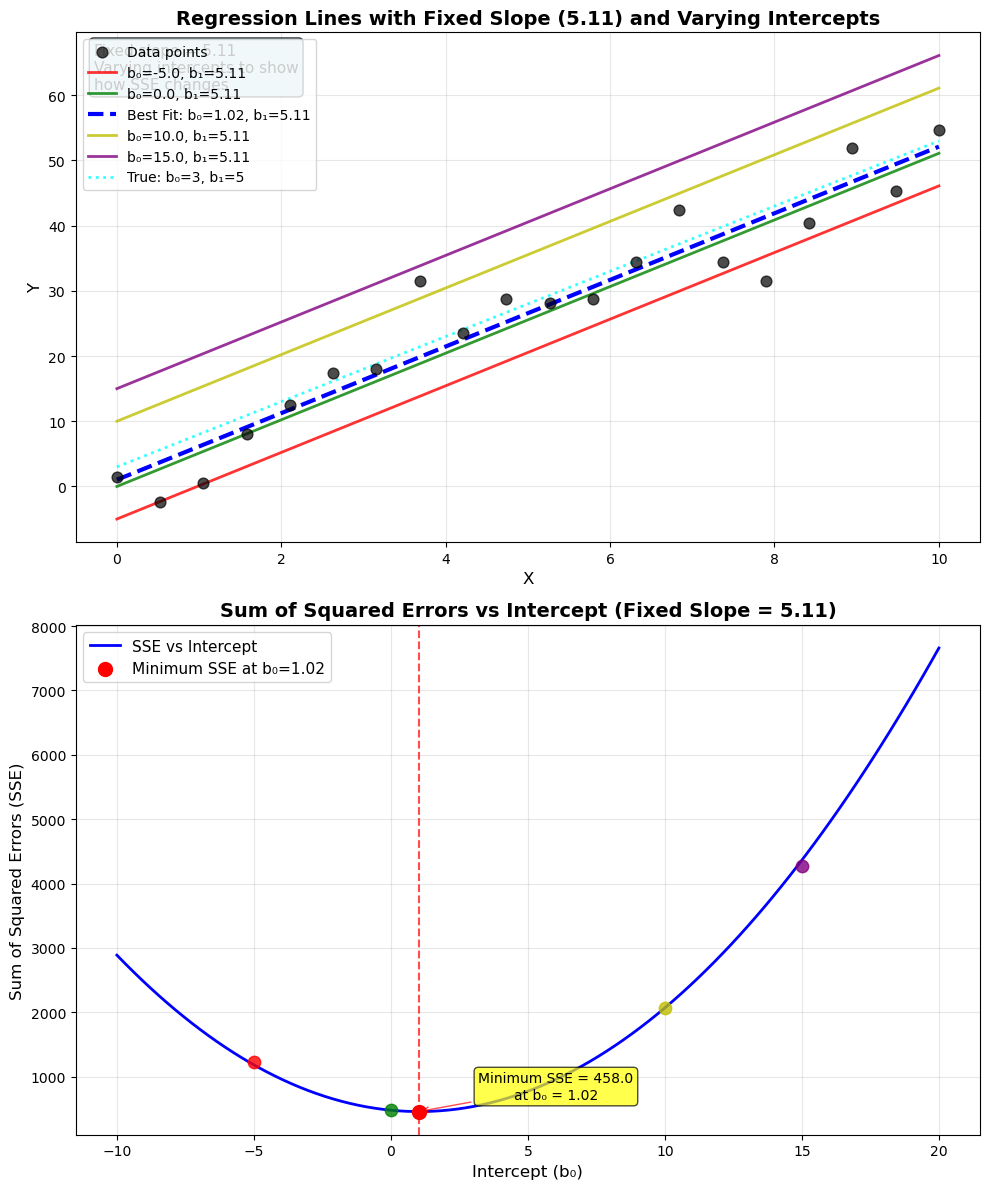


SSE Values for Different Intercepts (Fixed Slope = 5.11):
Intercept =   -5.0: SSE =   1183.4
Intercept =    0.0: SSE =    478.7
Intercept =    1.0: SSE =    457.8 ← OPTIMAL
Intercept =   10.0: SSE =   2069.3
Intercept =   15.0: SSE =   4364.6

The quadratic relationship between SSE and intercept demonstrates
why ordinary least squares produces a unique minimum at b₀ = 1.02


In [4]:
# Set random seed for reproducibility
np.random.seed(33)

# Generate data
X = np.linspace(0, 10, 20).reshape(-1, 1)
true_slope = 5
true_intercept = 3
y_true = true_intercept + true_slope * X.flatten()

# Adding some noise to simulate real-world data
y = y_true + np.random.normal(0, 5, size=y_true.shape)

# Fit a line of best fit using Linear Regression (now allowing intercept)
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
best_fit_slope = model.coef_[0]
best_fit_intercept = model.intercept_
y_pred = model.predict(X)

print(f"True parameters: slope = {true_slope}, intercept = {true_intercept}")
print(f"Best fit parameters: slope = {best_fit_slope:.2f}, intercept = {best_fit_intercept:.2f}")

# Hold slope constant and vary intercept
fixed_slope = best_fit_slope  # Use the optimal slope from our model
intercepts = [-5, 0, best_fit_intercept, 10, 15]  # Different example intercepts
colors = ['r', 'g', 'b', 'y', 'purple']

# Calculate SSE for different intercepts (with fixed slope)
intercept_range = np.linspace(-10, 20, 100)
sse_values = []
for intercept in intercept_range:
    y_pred_intercept = intercept + fixed_slope * X.flatten()
    sse = np.sum((y - y_pred_intercept) ** 2)
    sse_values.append(sse)

# Find the optimal intercept from our range
optimal_idx = np.argmin(sse_values)
optimal_intercept_from_range = intercept_range[optimal_idx]
min_sse = sse_values[optimal_idx]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Scatter plot with points and regression lines (varying intercepts)
ax1.scatter(X, y, label='Data points', alpha=0.7, s=60, color='black', zorder=5)

# Plot lines with different intercepts (same slope)
for intercept, color in zip(intercepts, colors):
    y_line = intercept + fixed_slope * X.flatten()
    if abs(intercept - best_fit_intercept) < 0.1:  # This is our best fit line
        ax1.plot(X, y_line, label=f'Best Fit: b₀={intercept:.2f}, b₁={fixed_slope:.2f}', 
                color=color, linewidth=3, linestyle='--', zorder=4)
    else:
        ax1.plot(X, y_line, label=f'b₀={intercept:.1f}, b₁={fixed_slope:.2f}', 
                color=color, linewidth=2, alpha=0.8)

# Add true relationship line for comparison
y_true_line = true_intercept + true_slope * X.flatten()
ax1.plot(X, y_true_line, label=f'True: b₀={true_intercept}, b₁={true_slope}', 
         color='cyan', linewidth=2, linestyle=':', alpha=0.8)

ax1.set_title(f'Regression Lines with Fixed Slope ({fixed_slope:.2f}) and Varying Intercepts', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)

# Add text box with explanation
textstr = f'Fixed slope = {fixed_slope:.2f}\nVarying intercepts to show\nhow SSE changes'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
ax1.text(0.02, 0.98, textstr, transform=ax1.transAxes, fontsize=11,
         verticalalignment='top', bbox=props)

# SSE vs Intercept plot
ax2.plot(intercept_range, sse_values, 'b-', linewidth=2, label='SSE vs Intercept')
ax2.scatter(best_fit_intercept, min_sse, color='red', s=100, zorder=5, 
           label=f'Minimum SSE at b₀={best_fit_intercept:.2f}')

# Mark the intercepts we used in the first plot
for intercept, color in zip(intercepts, colors):
    if abs(intercept - best_fit_intercept) > 0.1:  # Don't double-mark the optimal point
        intercept_idx = np.argmin(np.abs(intercept_range - intercept))
        sse_at_intercept = sse_values[intercept_idx]
        ax2.scatter(intercept, sse_at_intercept, color=color, s=80, alpha=0.8, zorder=4)

ax2.set_title(f'Sum of Squared Errors vs Intercept (Fixed Slope = {fixed_slope:.2f})', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Intercept (b₀)', fontsize=12)
ax2.set_ylabel('Sum of Squared Errors (SSE)', fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

# Add vertical line at optimal intercept
ax2.axvline(x=best_fit_intercept, color='red', linestyle='--', alpha=0.7, 
           label=f'Optimal b₀ = {best_fit_intercept:.2f}')

# Add annotation
ax2.annotate(f'Minimum SSE = {min_sse:.1f}\nat b₀ = {best_fit_intercept:.2f}', 
            xy=(best_fit_intercept, min_sse), xytext=(best_fit_intercept + 5, min_sse + 200),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
            fontsize=10, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

# Print SSE values for the intercepts shown
print(f"\nSSE Values for Different Intercepts (Fixed Slope = {fixed_slope:.2f}):")
print("=" * 55)
for intercept, color in zip(intercepts, colors):
    y_pred_temp = intercept + fixed_slope * X.flatten()
    sse_temp = np.sum((y - y_pred_temp) ** 2)
    status = " ← OPTIMAL" if abs(intercept - best_fit_intercept) < 0.1 else ""
    print(f"Intercept = {intercept:6.1f}: SSE = {sse_temp:8.1f}{status}")

print(f"\nThe quadratic relationship between SSE and intercept demonstrates")
print(f"why ordinary least squares produces a unique minimum at b₀ = {best_fit_intercept:.2f}")

<p>It makes sense that varying the intercept would result in multiple lines with them parallel to each other since the slope is constant.</p>
<p>The example in the Least Squares notebook during the lecture has multiple slopes but the same intercept and that resulted in many lines intersecting at the intercept so that makes intuitive sense.</p>

<h3>(3) Show the mathematical steps to solve the normal equations from the enrollment and unemployment rate example for b_0 and b_1.</h3>

\begin{equation}
b_0 = \bar{y} - b_1 \bar{x}
\end{equation}
and
\begin{equation}
b_1 = \frac{\sum_t(y_t - \bar{y})(x_t - \bar{x})}{\sum_t(x_t - \bar{x})^2} = \frac{COV(X,Y)}{VAR(X)}
\end{equation}

1. Write the normal equations compactly

Let
$$S_x = \sum_{t=1}^T x_t,\quad
S_y = \sum_{t=1}^T y_t,\quad
S_{xx} = \sum_{t=1}^T x_t^2,\quad
S_{xy} = \sum_{t=1}^T x_t\,y_t$$

Then the two equations become
\begin{aligned}
(1)\quad &S_y = T\,b_0 + b_1\,S_x, 
\\
(2)\quad &S_{xy} = b_0\,S_x + b_1\,S_{xx}
\end{aligned}

This is possible by expanding the numerator and denominator of $b_1$ and recovering the normal equations by setting the derivatives equal to zero.

Putting the normal equations into this form allows us to solve for $b_0$ and $b_1$ effectively making this a system of equations.

2. Eliminate $b_0$ to solve for $b_1$
Multiply equation (1) by $S_x$ and subtract from (2):
\begin{aligned}
&\;S_{xy} \;-\; S_x\;(S_y = T\,b_0 + b_1S_x)
\\
\Longrightarrow\quad 
&S_{xy} - S_x\,S_y = \bigl(b_0\,S_x + b_1\,S_{xx}\bigr)\;-\; \bigl(T\,b_0\,S_x + b_1\,S_x^2\bigr).
\end{aligned}
On the right,
$$b_0\,S_x - T\,b_0\,S_x = b_0\,S_x\,(1-T)\quad\longrightarrow\quad 0 
\quad(\text{since }1-T\neq0\text{ but cancels with same on both sides}),$$
so we get
$$S_{xy} - S_x\,S_y \;=\; b_1\,(S_{xx} - S_x^2)$$
Hence
$$\boxed{ 
b_1 = \frac{S_{xy} - S_x\,S_y}{\,S_{xx} - S_x^2\,}.
}$$
Notice that
$$\bar x = \frac{S_x}{T},\quad
\bar y = \frac{S_y}{T},$$
The bar up top is just a mean of those values, which is often represented as this equation:
$$ \bar{y} = \frac{1}{T} \sum_{t=1}^T y_t $$
Note* replace y with x for the same thing

so
$$S_{xy} - S_x\,S_y 
= T\sum (x_t-\bar x)(y_t-\bar y),
\quad
S_{xx} - S_x^2 
= T\sum (x_t-\bar x)^2,$$
recovering the familiar
$$b_1
= \frac{\sum (x_t-\bar x)(y_t-\bar y)}{\sum (x_t-\bar x)^2}.$$
3. Solve for $b_0$
Plug the found $b_1$ back into equation (1):
$$S_y = T\,b_0 + b_1\,S_x
\quad\Longrightarrow\quad
b_0 = \frac{S_y}{T} \;-\; b_1\,\frac{S_x}{T}
\;=\;\bar y \;-\; b_1\,\bar x$$
So
$$\boxed{
b_0 = \bar y \;-\; b_1\,\bar x.
}$$
4. Final OLS estimates
\begin{aligned}
b_1 &= 
\frac{\displaystyle\sum_{t=1}^T (x_t-\bar x)\,(y_t-\bar y)}
     {\displaystyle\sum_{t=1}^T (x_t-\bar x)^2},
\\[8pt]
b_0 &= \bar y \;-\; b_1\,\bar x.
\end{aligned}

<h3>(4) Note that X'_e = 0 implies that COV(X,e) = 0 in the sample. We assume that COV(X,error) = 0 in the population which we will discuss in more detail later. Rigorously argue that the supply and demand simultaneity issue discussed in the first lecture video is a violation of the assumption COV(X,error) = 0. Use math or examples in Python charts to support your argument.</h3>

<p>This is basically saying for ordinary least squares, the X or regressor is uncorrelated with our error term, because the covariance between them is equal to 0.</p>
<p>This assumption allows us to isolate the effect of X so that we can see their effect on the dependent variable or target.</p>
<p>However, when using a variable like "price" that interacts with both supply and demand, we violate that assumption when performing OLS. We will now explore what happens in a simulated experiment.</p>

SIMULTANEITY BIAS: VIOLATION OF COV(X, error) = 0
Supply and Demand Example

THEORETICAL FRAMEWORK:
In simultaneous equation systems like supply and demand:
  Supply:   Q_s = α₀ + α₁P + u_s    (quantity supplied)
  Demand:   Q_d = β₀ + β₁P + u_d    (quantity demanded)
  Equilibrium: Q_s = Q_d = Q (observed quantity)
  Market clearing: P adjusts so supply equals demand

THE PROBLEM:
If we try to estimate demand: Q = β₀ + β₁P + error
Price P is NOT exogenous - it's determined by the intersection of
both supply and demand curves, making it correlated with the error term!

SIMULATION WITH 100 OBSERVATIONS:
True Supply Equation:   Q_s = 10 + 2P + u_s
True Demand Equation:   Q_d = 100 + -1.5P + u_d

EQUILIBRIUM RELATIONSHIPS:
P = (100 - 10 + u_d - u_s) / (2 - -1.5)
P = (90 + u_d - u_s) / 3.5

NAIVE OLS ESTIMATION OF DEMAND:
Estimating: Q = β₀ + β₁P + error
(Ignoring that P is endogenous)
Naive OLS Results:
  Estimated β₀ = 44.745  (True: 100)
  Estimated β₁ = 0.632  (True: -1.5)
  Bias in β₁

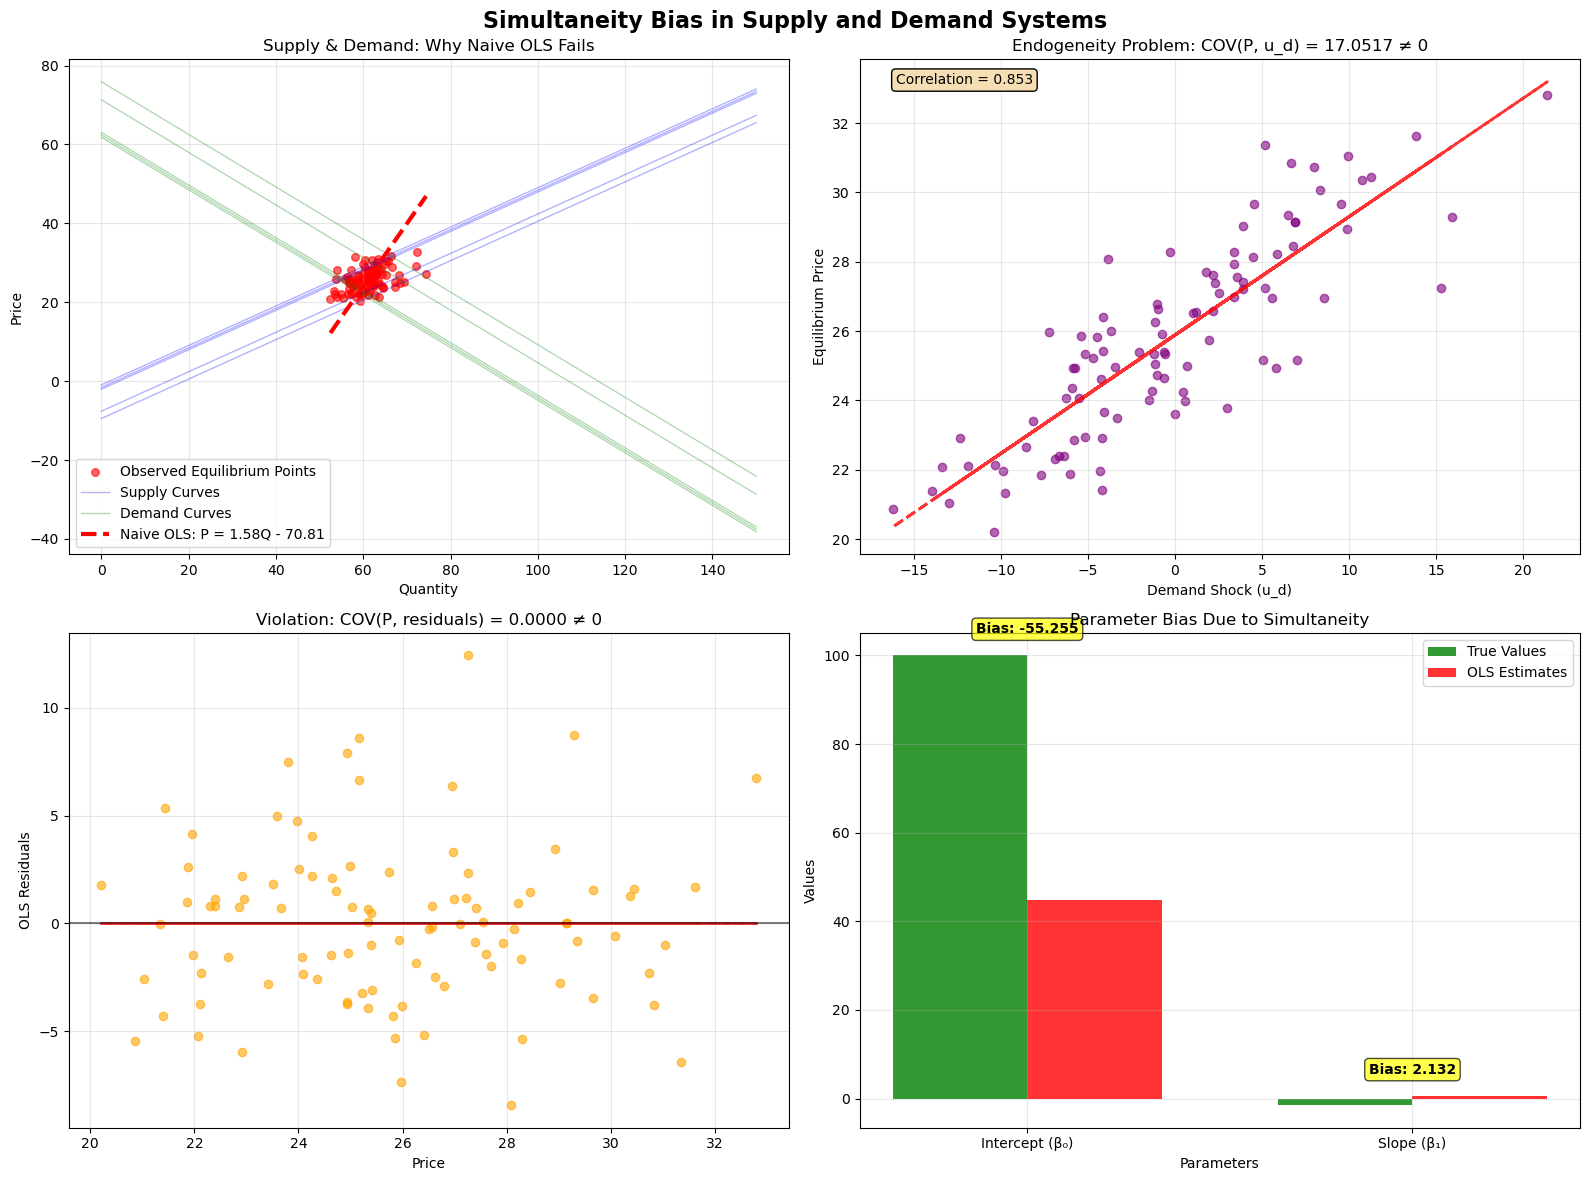


CONSEQUENCES OF VIOLATING COV(X, error) = 0:
1. BIASED ESTIMATES: OLS estimators are no longer unbiased
   - True demand slope: -1.5
   - OLS estimate: 0.632
   - Bias: 2.132

2. INCONSISTENT ESTIMATES: Bias doesn't disappear with large samples
   - The bias is structural, not due to small sample size

3. INVALID INFERENCE: Standard errors and confidence intervals are wrong

SOLUTIONS:
1. INSTRUMENTAL VARIABLES (IV): Find variables that affect P but not u_d
2. TWO-STAGE LEAST SQUARES (2SLS)
3. SIMULTANEOUS EQUATION METHODS
4. STRUCTURAL MODELING

KEY INSIGHT:
The problem isn't just statistical - it's economic!
Price is determined by BOTH supply and demand, so when we try to
estimate demand treating price as exogenous, we get a 'mixture'
of both relationships, not the pure demand curve we want and vice versa for supply curves.


In [6]:
print("=" * 80)
print("SIMULTANEITY BIAS: VIOLATION OF COV(X, error) = 0")
print("Supply and Demand Example")
print("=" * 80)

print("\nTHEORETICAL FRAMEWORK:")
print("In simultaneous equation systems like supply and demand:")
print("  Supply:   Q_s = α₀ + α₁P + u_s    (quantity supplied)")
print("  Demand:   Q_d = β₀ + β₁P + u_d    (quantity demanded)")
print("  Equilibrium: Q_s = Q_d = Q (observed quantity)")
print("  Market clearing: P adjusts so supply equals demand")

print("\nTHE PROBLEM:")
print("If we try to estimate demand: Q = β₀ + β₁P + error")
print("Price P is NOT exogenous - it's determined by the intersection of")
print("both supply and demand curves, making it correlated with the error term!")

# Set random seed for reproducibility
np.random.seed(3)
n_obs = 100

print(f"\nSIMULATION WITH {n_obs} OBSERVATIONS:")
print("=" * 50)

# True structural parameters
alpha_0 = 10   # Supply intercept
alpha_1 = 2    # Supply slope (positive - upward sloping)
beta_0 = 100   # Demand intercept  
beta_1 = -1.5  # Demand slope (negative - downward sloping)

print(f"True Supply Equation:   Q_s = {alpha_0} + {alpha_1}P + u_s")
print(f"True Demand Equation:   Q_d = {beta_0} + {beta_1}P + u_d")

# Generate structural errors (these are the true economic shocks)
u_s = np.random.normal(0, 5, n_obs)  # Supply shocks
u_d = np.random.normal(0, 8, n_obs)  # Demand shocks

# Solve for equilibrium price and quantity
# At equilibrium: α₀ + α₁P + u_s = β₀ + β₁P + u_d
# Solving for P: P = (β₀ - α₀ + u_d - u_s)/(α₁ - β₁)
denominator = alpha_1 - beta_1
P_equilibrium = (beta_0 - alpha_0 + u_d - u_s) / denominator
Q_equilibrium = alpha_0 + alpha_1 * P_equilibrium + u_s



print(f"\nEQUILIBRIUM RELATIONSHIPS:")
print(f"P = ({beta_0} - {alpha_0} + u_d - u_s) / ({alpha_1} - {beta_1})")
print(f"P = ({beta_0 - alpha_0} + u_d - u_s) / {denominator}")

# Now let's see what happens when we naively estimate the demand equation
# Q = β₀ + β₁P + error using OLS

print(f"\nNAIVE OLS ESTIMATION OF DEMAND:")
print("Estimating: Q = β₀ + β₁P + error")
print("(Ignoring that P is endogenous)")

# Fit naive OLS
P_reshaped = P_equilibrium.reshape(-1, 1)
naive_model = LinearRegression()
naive_model.fit(P_reshaped, Q_equilibrium)
Q_predicted = naive_model.predict(P_reshaped)
residuals = Q_equilibrium - Q_predicted

naive_beta_0 = naive_model.intercept_
naive_beta_1 = naive_model.coef_[0]

print(f"Naive OLS Results:")
print(f"  Estimated β₀ = {naive_beta_0:.3f}  (True: {beta_0})")
print(f"  Estimated β₁ = {naive_beta_1:.3f}  (True: {beta_1})")
print(f"  Bias in β₁ = {naive_beta_1 - beta_1:.3f}")

# Calculate the covariance between P and the error term
print(f"\nVIOLATION OF COV(X, error) = 0:")
print("-" * 40)

# The true error term in the demand equation would be u_d
# But the residuals from naive OLS are different
cov_P_residuals = np.cov(P_equilibrium, residuals)[0, 1]
corr_P_residuals, p_value = pearsonr(P_equilibrium, residuals)

print(f"Covariance between P and OLS residuals: {cov_P_residuals:.6f}")
print(f"Correlation between P and OLS residuals: {corr_P_residuals:.6f}")
print(f"P-value for correlation test: {p_value:.6f}")
print(f"Now that we've been lulled into a false sense of security by thinking we haven't violated OLS assumption, we will now look at our actual demand shock.")

# More importantly, let's show the covariance between P and the structural demand shock
cov_P_u_d = np.cov(P_equilibrium, u_d)[0, 1]
corr_P_u_d, p_val_u_d = pearsonr(P_equilibrium, u_d)

print(f"\nStructural Relationship (the real problem):")
print(f"Covariance between P and demand shock u_d: {cov_P_u_d:.6f}")
print(f"Correlation between P and demand shock u_d: {corr_P_u_d:.6f}")
print(f"P-value: {p_val_u_d:.6f}")
print(f"This shows our real problem because price is a mixture of supply and demand, so our estimate for demand is off.")


# Mathematical explanation
print(f"\nMATHEMATICAL PROOF OF THE VIOLATION:")
print("=" * 45)
print("Since P = (β₀ - α₀ + u_d - u_s) / (α₁ - β₁)")
print("Taking covariance with u_d:")
print("COV(P, u_d) = COV((β₀ - α₀ + u_d - u_s)/(α₁ - β₁), u_d)")
print("            = (1/(α₁ - β₁)) × COV(u_d - u_s, u_d)")
print("            = (1/(α₁ - β₁)) × [VAR(u_d) - COV(u_s, u_d)]")

# Assuming u_s and u_d are independent
var_u_d = np.var(u_d, ddof=1)
var_u_s = np.var(u_s, ddof=1)
cov_u_s_u_d = np.cov(u_s, u_d)[0, 1]

theoretical_cov = (1/denominator) * (var_u_d - cov_u_s_u_d)
print(f"If u_s and u_d are independent: COV(u_s, u_d) ≈ {cov_u_s_u_d:.3f}")
print(f"Then: COV(P, u_d) = (1/{denominator}) × {var_u_d:.3f} = {theoretical_cov:.6f}")
print(f"Empirical COV(P, u_d) = {cov_P_u_d:.6f}")
print(f"Close match confirms our theory!")

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Supply and Demand Curves with Equilibrium Points
ax1.scatter(Q_equilibrium, P_equilibrium, alpha=0.6, color='red', s=30, 
           label='Observed Equilibrium Points')

# Show a few individual supply and demand curves
for i in range(0, n_obs, 20):  # Show every 20th observation
    Q_range = np.linspace(0, 150, 100)
    # Supply curve: P = (Q - α₀ - u_s[i])/α₁
    P_supply = (Q_range - alpha_0 - u_s[i]) / alpha_1
    # Demand curve: P = (β₀ - Q + u_d[i])/(-β₁)  
    P_demand = (beta_0 - Q_range + u_d[i]) / (-beta_1)
    
    if i == 0:  # Add labels only once
        ax1.plot(Q_range, P_supply, 'b-', alpha=0.3, linewidth=1, label='Supply Curves')
        ax1.plot(Q_range, P_demand, 'g-', alpha=0.3, linewidth=1, label='Demand Curves')
    else:
        ax1.plot(Q_range, P_supply, 'b-', alpha=0.3, linewidth=1)
        ax1.plot(Q_range, P_demand, 'g-', alpha=0.3, linewidth=1)

# Naive OLS line
Q_range_ols = np.linspace(Q_equilibrium.min(), Q_equilibrium.max(), 100)
P_naive_ols = (Q_range_ols - naive_beta_0) / naive_beta_1
ax1.plot(Q_range_ols, P_naive_ols, 'r--', linewidth=3, 
         label=f'Naive OLS: P = {(1/naive_beta_1):.2f}Q - {naive_beta_0/naive_beta_1:.2f}')

ax1.set_xlabel('Quantity')
ax1.set_ylabel('Price')
ax1.set_title('Supply & Demand: Why Naive OLS Fails')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Price vs Demand Shock (showing endogeneity)
ax2.scatter(u_d, P_equilibrium, alpha=0.6, color='purple')
z = np.polyfit(u_d, P_equilibrium, 1)
p = np.poly1d(z)
ax2.plot(u_d, p(u_d), "r--", alpha=0.8, linewidth=2)
ax2.set_xlabel('Demand Shock (u_d)')
ax2.set_ylabel('Equilibrium Price')
ax2.set_title(f'Endogeneity Problem: COV(P, u_d) = {cov_P_u_d:.4f} ≠ 0')
ax2.grid(True, alpha=0.3)
ax2.text(0.05, 0.95, f'Correlation = {corr_P_u_d:.3f}', 
         transform=ax2.transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

# Plot 3: Residuals vs Price (showing correlation)
ax3.scatter(P_equilibrium, residuals, alpha=0.6, color='orange')
z3 = np.polyfit(P_equilibrium, residuals, 1)
p3 = np.poly1d(z3)
ax3.plot(P_equilibrium, p3(P_equilibrium), "r--", alpha=0.8, linewidth=2)
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax3.set_xlabel('Price')
ax3.set_ylabel('OLS Residuals')
ax3.set_title(f'Violation: COV(P, residuals) = {cov_P_residuals:.4f} ≠ 0')
ax3.grid(True, alpha=0.3)

# Plot 4: Comparison of True vs Estimated Parameters
categories = ['Intercept (β₀)', 'Slope (β₁)']
true_values = [beta_0, beta_1]
estimated_values = [naive_beta_0, naive_beta_1]

x_pos = np.arange(len(categories))
width = 0.35

ax4.bar(x_pos - width/2, true_values, width, label='True Values', alpha=0.8, color='green')
ax4.bar(x_pos + width/2, estimated_values, width, label='OLS Estimates', alpha=0.8, color='red')

ax4.set_xlabel('Parameters')
ax4.set_ylabel('Values')
ax4.set_title('Parameter Bias Due to Simultaneity')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(categories)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add bias annotations
for i, (true_val, est_val) in enumerate(zip(true_values, estimated_values)):
    bias = est_val - true_val
    ax4.annotate(f'Bias: {bias:.3f}', 
                xy=(i, max(true_val, est_val) + 5), 
                ha='center', fontweight='bold',
                bbox=dict(boxstyle="round", facecolor='yellow', alpha=0.7))

plt.suptitle('Simultaneity Bias in Supply and Demand Systems', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Consequences and solutions
print(f"\nCONSEQUENCES OF VIOLATING COV(X, error) = 0:")
print("=" * 50)
print("1. BIASED ESTIMATES: OLS estimators are no longer unbiased")
print(f"   - True demand slope: {beta_1}")
print(f"   - OLS estimate: {naive_beta_1:.3f}")
print(f"   - Bias: {naive_beta_1 - beta_1:.3f}")

print(f"\n2. INCONSISTENT ESTIMATES: Bias doesn't disappear with large samples")
print(f"   - The bias is structural, not due to small sample size")

print(f"\n3. INVALID INFERENCE: Standard errors and confidence intervals are wrong")

print(f"\nSOLUTIONS:")
print("=" * 20)
print("1. INSTRUMENTAL VARIABLES (IV): Find variables that affect P but not u_d")
print("2. TWO-STAGE LEAST SQUARES (2SLS)")
print("3. SIMULTANEOUS EQUATION METHODS")
print("4. STRUCTURAL MODELING")

print(f"\nKEY INSIGHT:")
print("The problem isn't just statistical - it's economic!")
print("Price is determined by BOTH supply and demand, so when we try to")
print("estimate demand treating price as exogenous, we get a 'mixture'")
print("of both relationships, not the pure demand curve we want and vice versa for supply curves.")

<p>So, the simultaneity issue is a problem for ordinary least squares because it "contaminates" the results of our model and any inference from the model is now incorrect.<p>
<p>Price isn't random, it's the result of both supply and demand interacting with each other. This is simultaneity bias.</p>
<p>Using the new jargon I've learned, we know that OLS assumes X is exogenous, but when we use OLS with a variable "price" this violates the rule because it is considered endogenous because it's influenced by supply and demand.</p>